In [ ]:
import re
import nltk
import datetime
import pandas as pd
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
def get_data():
    datafile = open('/content/drive/MyDrive/Projects/Senty/Iron Man.srt')
    data = datafile.readlines()
    return data

In [ ]:
datalist = get_data()
startlist, endlist, subslist = [], [], []
subs = ''
for i in range(len(datalist)):
    if re.match(r'[0-9]{1,}\n', datalist[i]):
        pass
    elif re.match(r'[0-9]{2}:[0-9]{2}:[0-9]{2},[0-9]{3}\s{1}-->\s{1}[0-9]{2}:[0-9]{2}:[0-9]{2},[0-9]{3}\n', datalist[i]):
        t = datalist[i][:-1]
        t = t.split(' --> ')
        t1 = t[0].split(':')
        t1[2] = t1[2][:2]
        t2 = t[1].split(':')
        t2[2] = t2[2][:2]
        start = datetime.datetime(1, 1, 1, int(t1[0]), int(t1[1]), int(t1[2]))
        end = datetime.datetime(1, 1, 1, int(t2[0]), int(t2[1]), int(t2[2]))
    elif re.match(r'\n', datalist[i]):
        startlist.append(start)
        endlist.append(end)
        subs = re.sub(r'\s{1,}', ' ', subs)
        subslist.append(subs)
        subs = ''
    else:
        subs += datalist[i]

subsdf = pd.DataFrame({'Start':startlist, 'End':endlist, 'Subtitle':subslist})   

In [ ]:
subsdf.to_excel('/content/drive/MyDrive/Projects/Senty/IronMan.xlsx',index=False)

In [ ]:
sia = SIA()
C_Step = 10
C_CurrTime = C_PrevTime = datetime.datetime(1, 1, 1, 0, 0, 0)
currtime = 0
score = 0
timestep = datetime.timedelta(seconds = C_Step)
timelist, scorelist = [], []
timelist.append(f"{currtime//3600:02d}:{(currtime//60)%60:02d}:{currtime%60:02d}")
scorelist.append(score)
while C_CurrTime <= subsdf.End[len(subsdf)-1]:
    currtime += C_Step
    C_CurrTime += timestep
    tempdf = subsdf[(subsdf.Start > C_PrevTime) & (subsdf.Start <= C_CurrTime)]
    tempdf = tempdf.reset_index(drop=True)
    text = ''
    if len(tempdf) > 0:
        for i in range(len(tempdf)):
            text += tempdf['Subtitle'][i]
        score = sia.polarity_scores(text)['compound']
    else:
        score = 0
    timelist.append(f"{currtime//3600:02d}:{(currtime//60)%60:02d}:{currtime%60:02d}")
    scorelist.append(score)
    C_PrevTime = C_CurrTime
plotdf = pd.DataFrame({'Time': timelist, 'Score':scorelist})

In [ ]:
plotdf['Score'].value_counts()

 0.0000    380
 0.3612     10
 0.4404      9
 0.5106      7
 0.4019      6
          ... 
-0.7730      1
-0.4559      1
-0.4588      1
 0.8192      1
 0.7319      1
Name: Score, Length: 258, dtype: int64

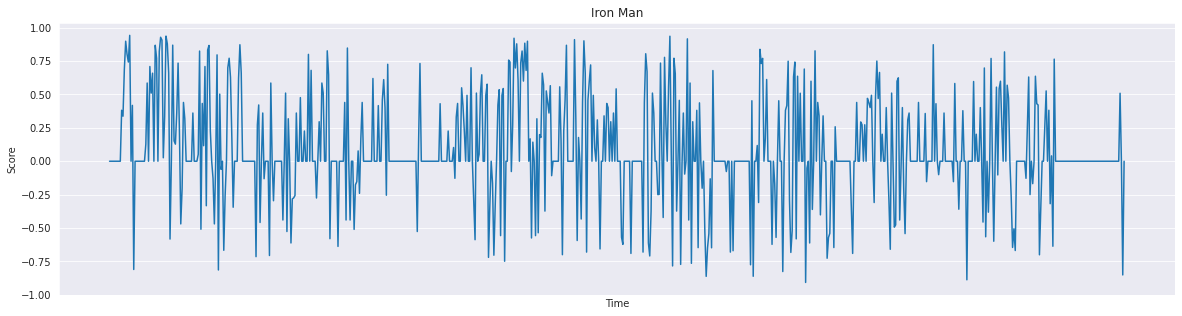

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

plt.figure(figsize=(20, 5))
sns.lineplot(x = 'Time', y = 'Score', data = plotdf)
plt.title('Iron Man')
plt.xticks([])
plt.show()